# Student Performance Indicator

## Life Cycle of Machine Learning Project

1. Problem Statement
2. Data Collection
3. Data Checks to Perform
4. Explanatory Data Analysis
5. Data Pre-Processing
6. Model Training
7. Model Selection

## 1. Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course etc.

## 2. Data Collection

- Dataset source: [Link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
- The dataset consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing `pandas`, `numpy`, `matplotlib`, `seaborn` and `warings` Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### 2.2 Import the Data

Let's import the data and explore the first few rows as well as the number of records.

In [2]:
df = pd.read_csv("data/stud.csv", index_col=False)

# Shape of dataframe
print("df.shape:", df.shape)
# Show first 5 records
df.head()

df.shape: (1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.3 Dataset Information

- `gender`: sex of students -> (Male/female)
- `race_ethnicity`: ethnicity of students -> (Group A, B, C, D, E)
- `parental_level_of_education`: parents' final level of education -> (Bachelor's degree, Some college, Master's degree, Associate's degree, High school)
- `lunch`: Quality of lunch (Standard or free/reduced)
- `test_preparation_course`: Completed or not completed before test
- `math_score`
- `reading_score`
- `writing_score`

In [3]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [4]:
dtypes = df.dtypes.to_dict()

for feature in df.columns:
    if dtypes[feature] == "object":
        print(f"Categories in {feature} variable: {np.unique(df[feature])}", end="\n\n")

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group A' 'group B' 'group C' 'group D' 'group E']

Categories in parental_level_of_education variable: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']

Categories in lunch variable: ['free/reduced' 'standard']

Categories in test_preparation_course variable: ['completed' 'none']



## 3. Data Checks

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set.

## 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates values in the dataset.

## 3.3 Check Data Types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check the Number of Unique Values in each Column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check Statistics of Dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

1. From above description of numerical data, all means are very close to each other - between $66$ and $68.05$.
2. All standard deviations are also close - between $14.6$ and $15.19$.
3. While there was a minimum score of $0$ for math, writing and reading scores were much higher ($10$ and $17$ respectively)

## 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print(
    "We have {} numerical features : {}".format(len(numeric_features), numeric_features)
)
print(
    "\nWe have {} categorical features : {}".format(
        len(categorical_features), categorical_features
    )
)

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## 3.8 Adding Columns for `total_score` and `average`

In [12]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average"] = df["total_score"] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df["reading_score"] == 100]["average"].count()
writing_full = df[df["writing_score"] == 100]["average"].count()
math_full = df[df["math_score"] == 100]["average"].count()

print(f"Number of students with full marks in Maths: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df["reading_score"] <= 20]["average"].count()
writing_less_20 = df[df["writing_score"] <= 20]["average"].count()
math_less_20 = df[df["math_score"] <= 20]["average"].count()

print(f"Number of students with less than 20 marks in Maths: {math_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights**
1. From above values we get students have performed the worst in Maths.
2. Best performance is in reading section.

## 4. Exploring Data (Visualization)

### 4.1 Visualize Average Score Distribution

- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

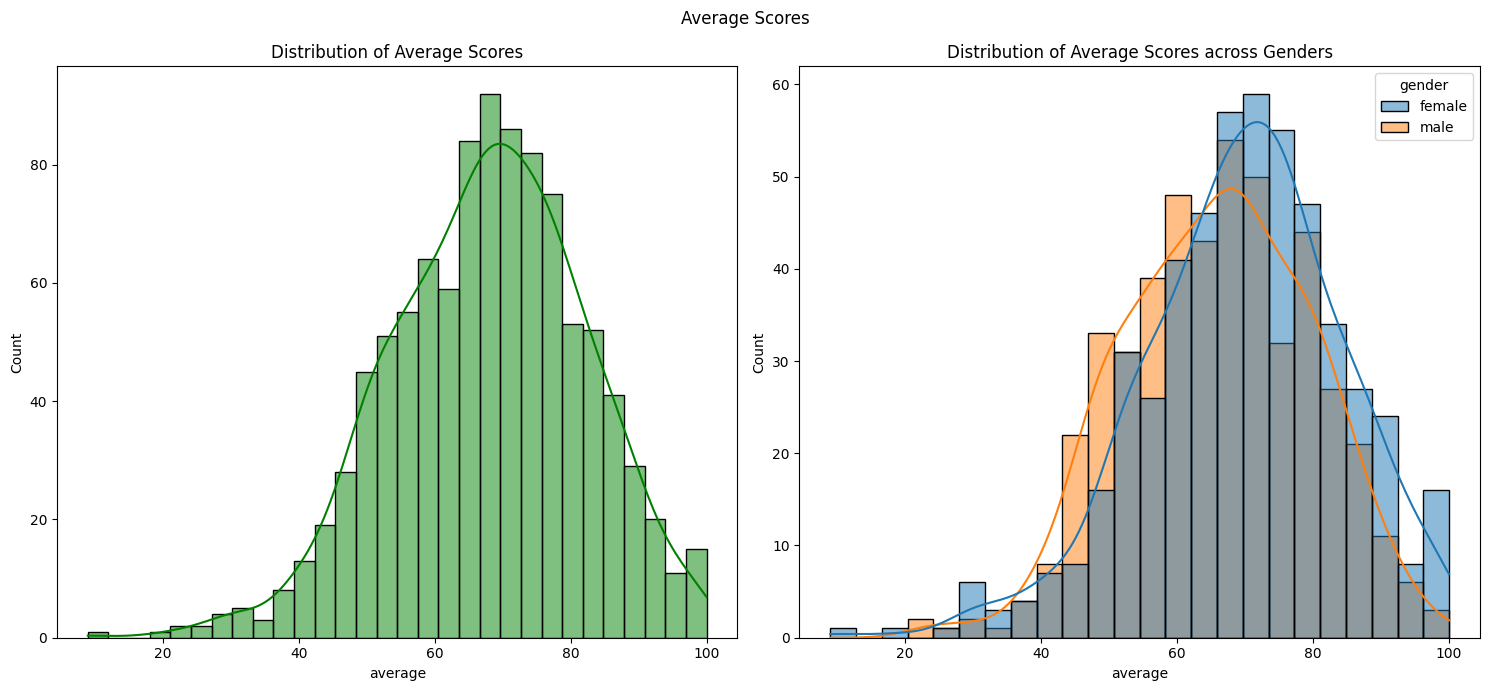

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="average", bins=30, kde=True, color="g")
plt.title("Distribution of Average Scores")
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, hue="gender")
plt.title("Distribution of Average Scores across Genders")
plt.suptitle("Average Scores")
plt.tight_layout()
plt.show()

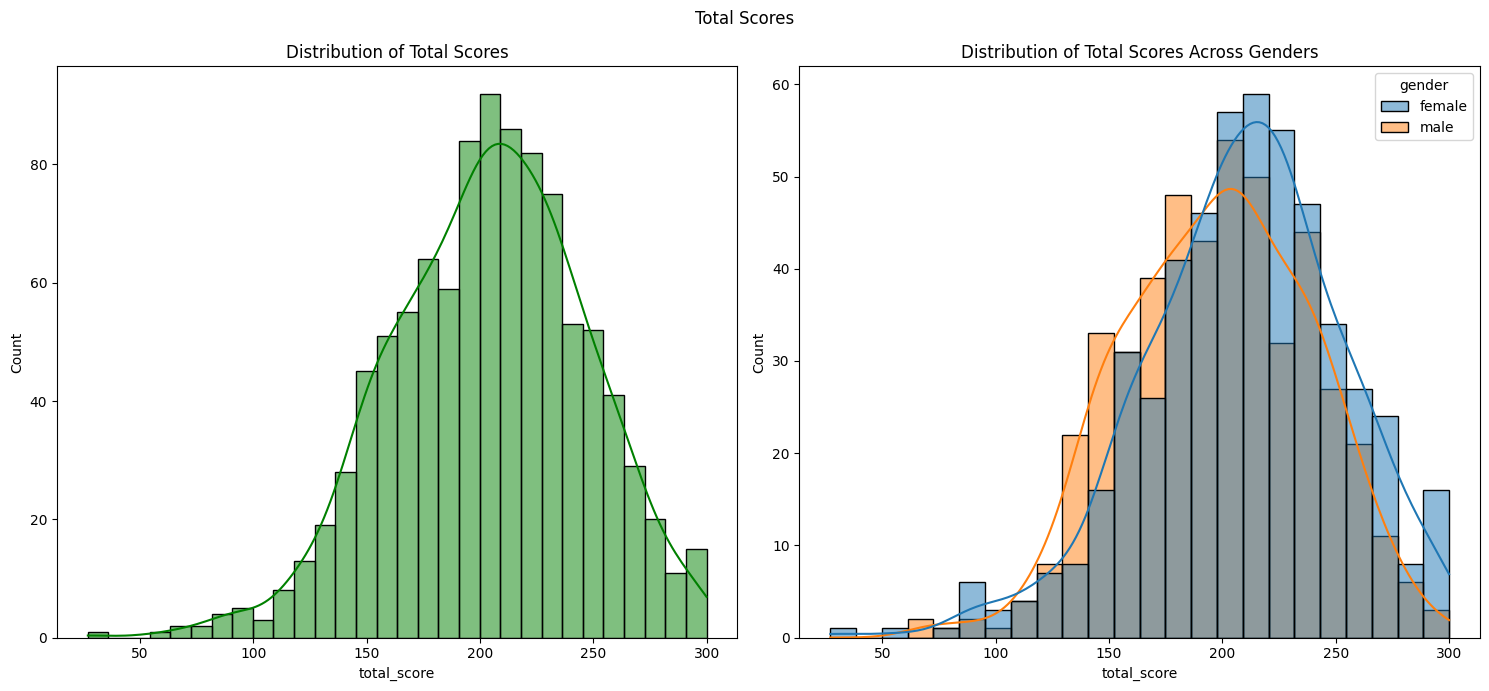

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x="total_score", bins=30, kde=True, color="g")
plt.title("Distribution of Total Scores")
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue="gender")
plt.title("Distribution of Total Scores Across Genders")
plt.suptitle("Total Scores")
plt.tight_layout()
plt.show()

**Insight**

1. Female students tend to perform well then male students.

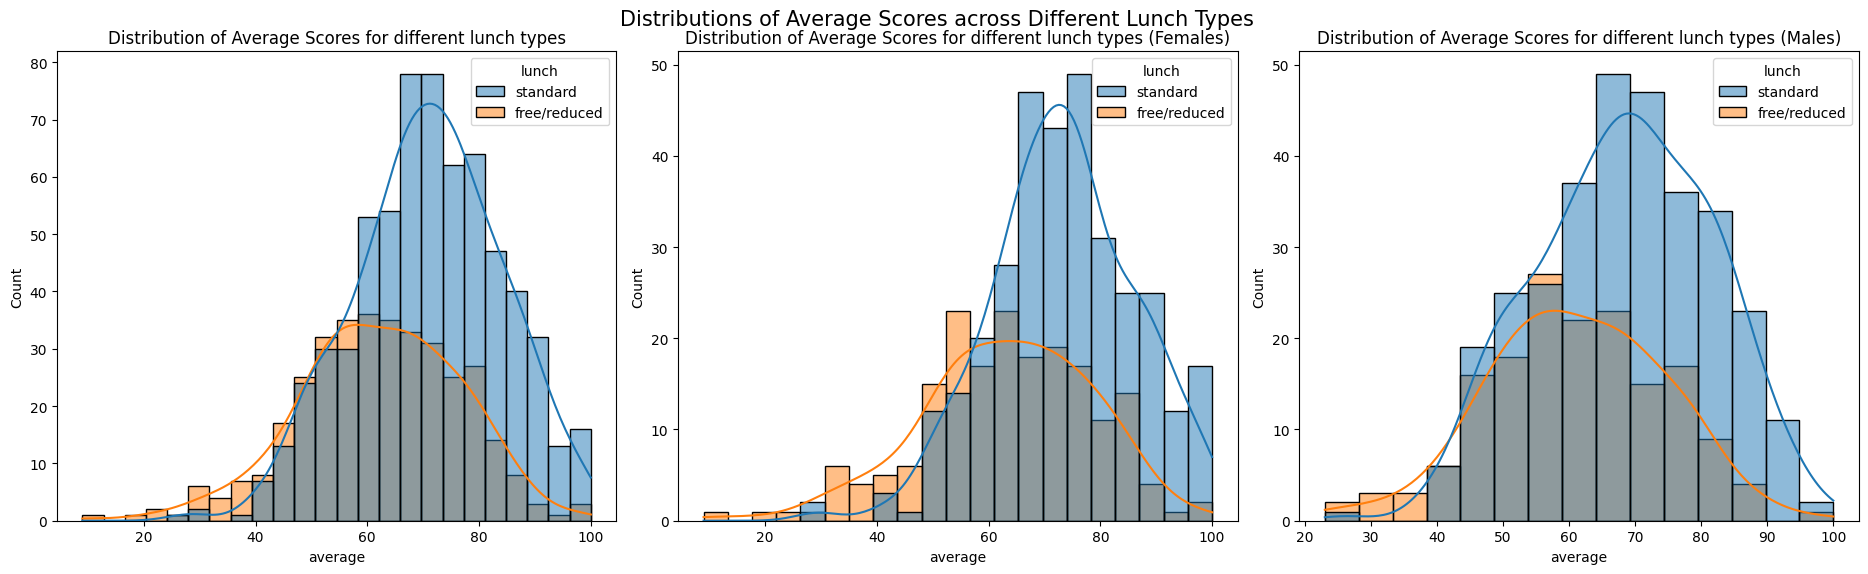

In [17]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(
    data=df.sort_values("lunch", ascending=False), x="average", kde=True, hue="lunch"
)

plt.title("Distribution of Average Scores for different lunch types")
plt.subplot(142)
sns.histplot(
    data=df[df.gender == "female"].sort_values("lunch", ascending=False),
    x="average",
    kde=True,
    hue="lunch",
)

plt.title("Distribution of Average Scores for different lunch types (Females)")
plt.subplot(143)
sns.histplot(
    data=df[df.gender == "male"].sort_values("lunch", ascending=False),
    x="average",
    kde=True,
    hue="lunch",
)
plt.title("Distribution of Average Scores for different lunch types (Males)")

plt.suptitle(
    "Distributions of Average Scores across Different Lunch Types",
    x=0.25,
    y=0.95,
    horizontalalignment="left",
    verticalalignment="top",
    fontsize=15,
)
plt.tight_layout()
plt.show()

**Insights**
1. Standard lunches help perform well in exams regardless of gender.

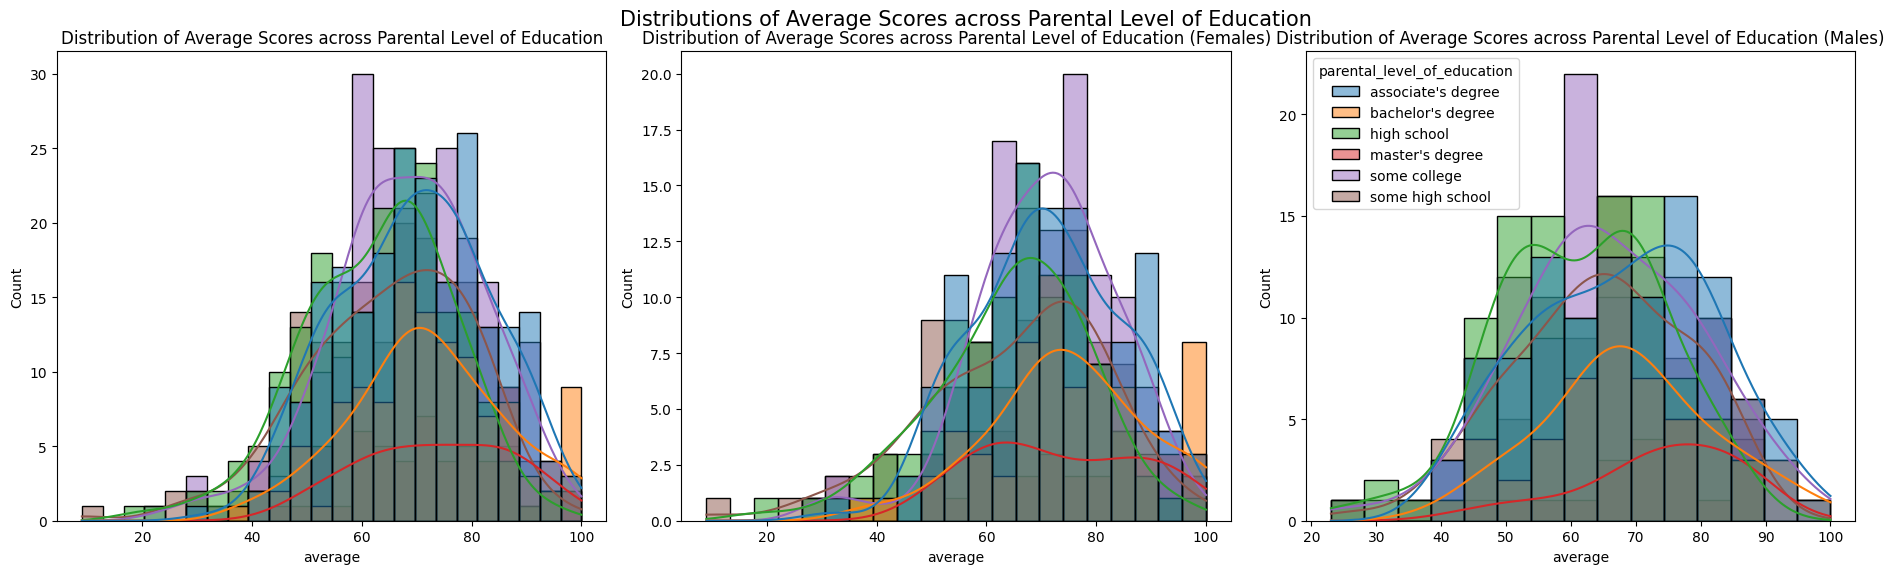

In [18]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(
    data=df.sort_values("parental_level_of_education"),
    x="average",
    kde=True,
    hue="parental_level_of_education",
)
ax.legend_.remove()

plt.title("Distribution of Average Scores across Parental Level of Education")
plt.subplot(142)
ax = sns.histplot(
    data=df[df.gender == "female"].sort_values("parental_level_of_education"),
    x="average",
    kde=True,
    hue="parental_level_of_education",
)
ax.legend_.remove()

plt.title("Distribution of Average Scores across Parental Level of Education (Females)")
plt.subplot(143)
ax = sns.histplot(
    data=df[df.gender == "male"].sort_values("parental_level_of_education"),
    x="average",
    kde=True,
    hue="parental_level_of_education",
)
plt.title("Distribution of Average Scores across Parental Level of Education (Males)")

plt.suptitle(
    "Distributions of Average Scores across Parental Level of Education",
    x=0.25,
    y=0.95,
    horizontalalignment="left",
    verticalalignment="top",
    fontsize=15,
)
plt.tight_layout()
plt.show()

**Insights**
1. In general, parent's education don't seem to help students perform well in exam.
2. For parents' whose education level was of either associate's degree or master's degree, male students tend to have better perform well in exams. 
3. In the plot looking at only female students (rightmost), parents' last education level seem to have no effect (although, females seem to perform better than male students as previously believed)

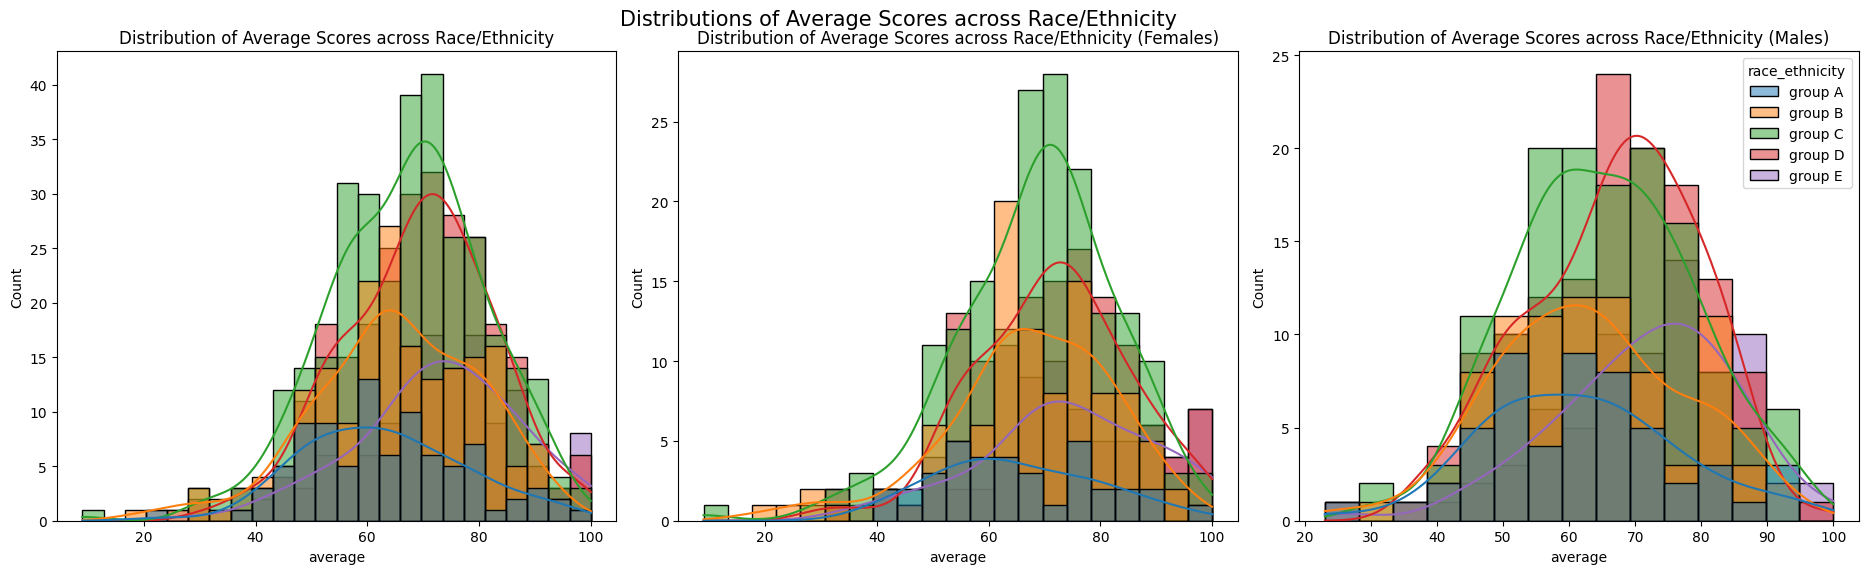

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(
    data=df.sort_values("race_ethnicity"), x="average", kde=True, hue="race_ethnicity"
)
plt.title("Distribution of Average Scores across Race/Ethnicity")
ax.legend_.remove()

plt.subplot(142)
ax = sns.histplot(
    data=df[df.gender == "female"].sort_values("race_ethnicity"),
    x="average",
    kde=True,
    hue="race_ethnicity",
)
plt.title("Distribution of Average Scores across Race/Ethnicity (Females)")
ax.legend_.remove()

plt.subplot(143)
ax = sns.histplot(
    data=df[df.gender == "male"].sort_values("race_ethnicity"),
    x="average",
    kde=True,
    hue="race_ethnicity",
)
plt.title("Distribution of Average Scores across Race/Ethnicity (Males)")

plt.suptitle(
    "Distributions of Average Scores across Race/Ethnicity",
    x=0.25,
    y=0.95,
    horizontalalignment="left",
    verticalalignment="top",
    fontsize=15,
)
plt.tight_layout()
plt.show()

**Insights**
1. Students of Group A and Group B tends to perform poorly in exam irregardless of gender.

### 4.2 Highest Scores Across All Three Subjects

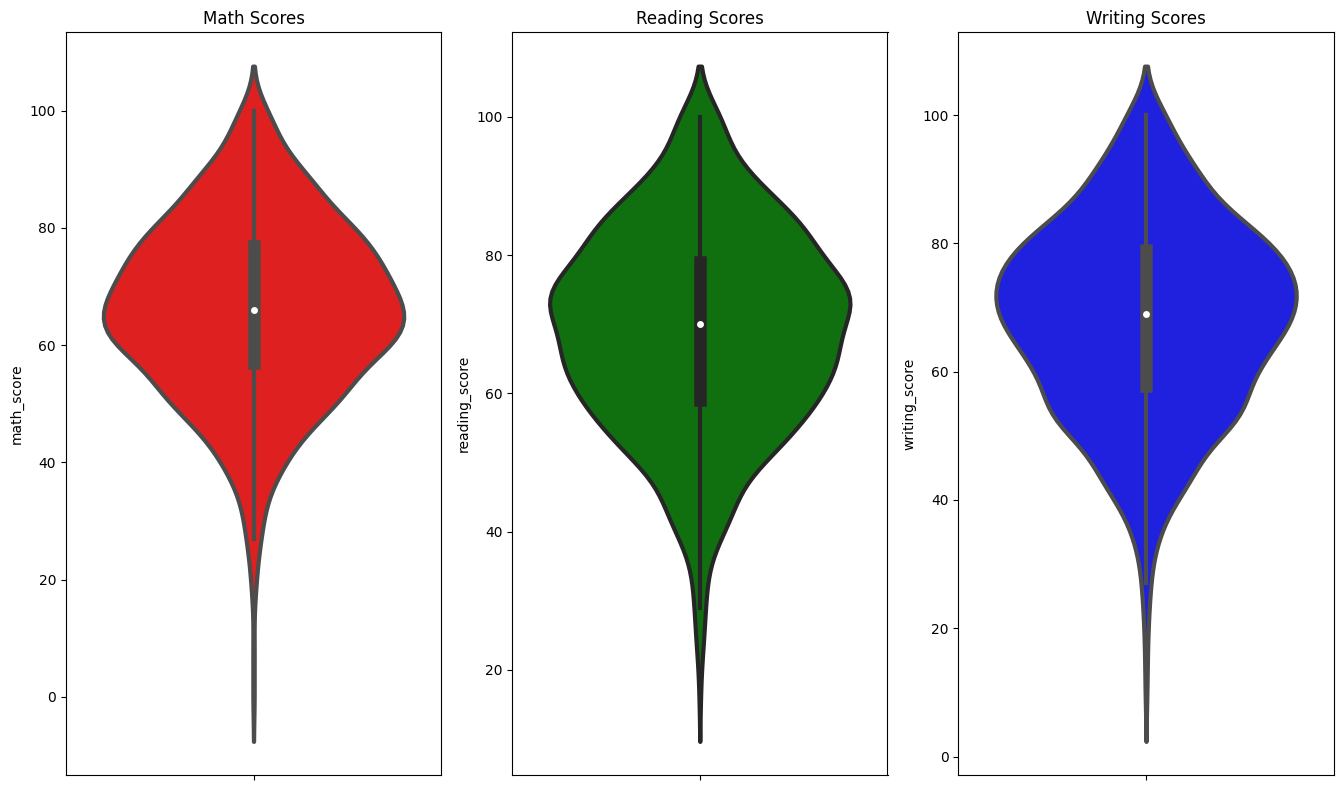

In [20]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title("Math Scores")
sns.violinplot(y="math_score", data=df, color="red", linewidth=3)
plt.subplot(1, 4, 2)
plt.title("Reading Scores")
sns.violinplot(y="reading_score", data=df, color="green", linewidth=3)
plt.subplot(1, 4, 3)
plt.title("Writing Scores")
sns.violinplot(y="writing_score", data=df, color="blue", linewidth=3)
plt.tight_layout()
plt.show()

**Insights**
1. From the above three plots its clearly visible that most of the students score in between $60-80$ in Maths whereas in reading and writing most of them score from $50-80$.

## 4.3 Multivariate Analysis using Pie-plot

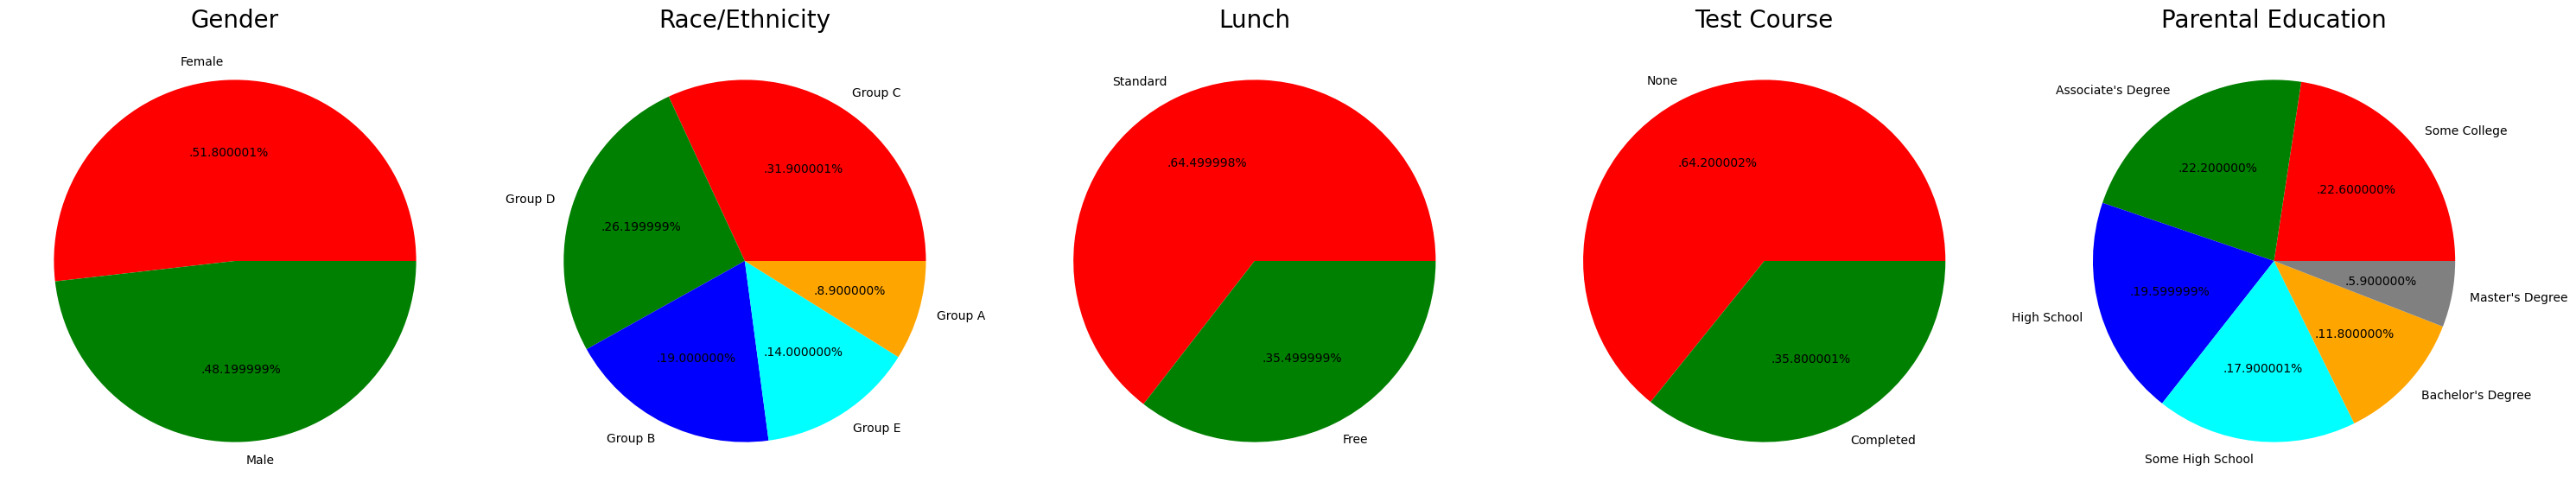

In [21]:
plt.rcParams["figure.figsize"] = (30, 12)

plt.subplot(1, 5, 1)
size = df["gender"].value_counts()
labels = "Female", "Male"
color = ["red", "green"]


plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 2)
size = df["race_ethnicity"].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"
color = ["red", "green", "blue", "cyan", "orange"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Race/Ethnicity", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 3)
size = df["lunch"].value_counts()
labels = "Standard", "Free"
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Lunch", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 4)
size = df["test_preparation_course"].value_counts()
labels = "None", "Completed"
color = ["red", "green"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Test Course", fontsize=20)
plt.axis("off")


plt.subplot(1, 5, 5)
size = df["parental_level_of_education"].value_counts()
labels = (
    "Some College",
    "Associate's Degree",
    "High School",
    "Some High School",
    "Bachelor's Degree",
    "Master's Degree",
)
color = ["red", "green", "blue", "cyan", "orange", "grey"]

plt.pie(size, colors=color, labels=labels, autopct=".%2f%%")
plt.title("Parental Education", fontsize=20)
plt.axis("off")


plt.tight_layout()
plt.grid()
plt.show()

**Insights**
1. Number of male and female students are almost equal.
2. Students in Group C of race/ethnicity are the largest group but the groups are rougly equally distributed.
3. Students who had standard lunches are almost twice as many as students who have free lunches.
4. Similarly, students who did not enroll in any test preparation course are almost twice as many as students who were enrolled.
5. Largest number of Students whose parental education level are categorized as "Some College" however, the groups are still rougly equally distributed.


## 4.4 Feature Wise Visualization

### 4.4.1 Gender

- What is the distribution of gender?
- Does gender have any impact on student's performance?

### Univariate Analysis (What is the distribution of gender?)

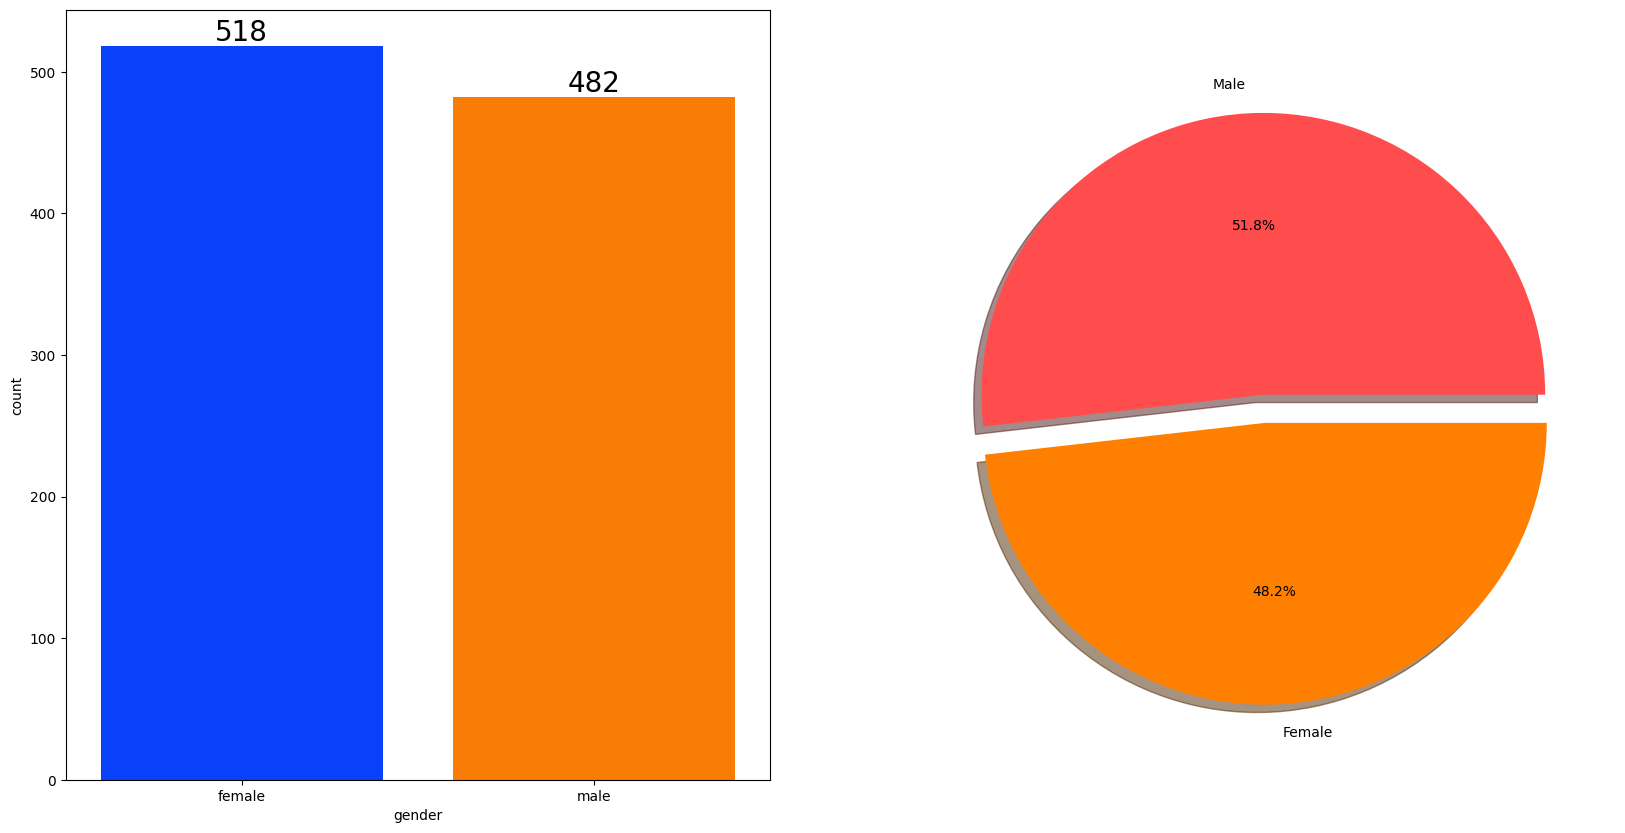

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df["gender"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(
    x=df["gender"].value_counts(),
    labels=["Male", "Female"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000"],
)
plt.show()

**Insights**
1. Gender has a balanced data with female students are 518 (48%) and male students are 482 (52%).

### Bivariate Analysis (Does gender have any impact on student's performance?)

In [23]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
numeric_features

['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

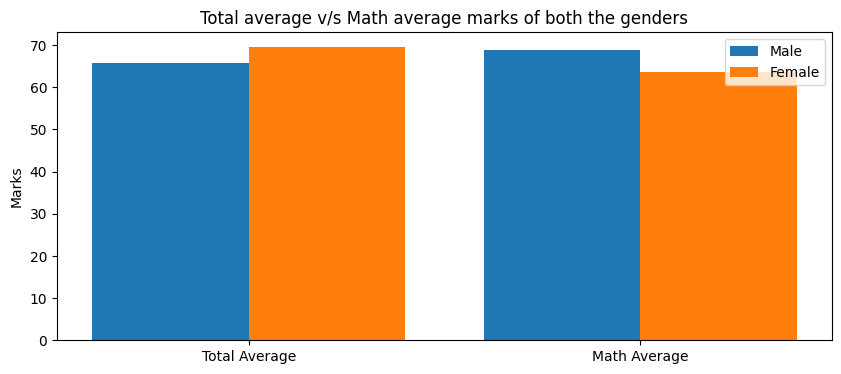

In [24]:
gender_group = df[["gender"] + numeric_features].groupby("gender").mean()

plt.figure(figsize=(10, 4))

X = ["Total Average", "Math Average"]


female_scores = [gender_group["average"][0], gender_group["math_score"][0]]
male_scores = [gender_group["average"][1], gender_group["math_score"][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label="Male")
plt.bar(X_axis + 0.2, female_scores, 0.4, label="Female")

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders")
plt.legend()
plt.show()

**Insights**
1. On an average, females have a better overall averaged score than males.
2. However, males have higher scores in Maths.

### 4.4.2 Race/Ethnicity

- How are the group-wise distributions?
- Does race/ethnicity have any impact on student's performance?

### Univariate Analysis (How are the group-wise distributions?)

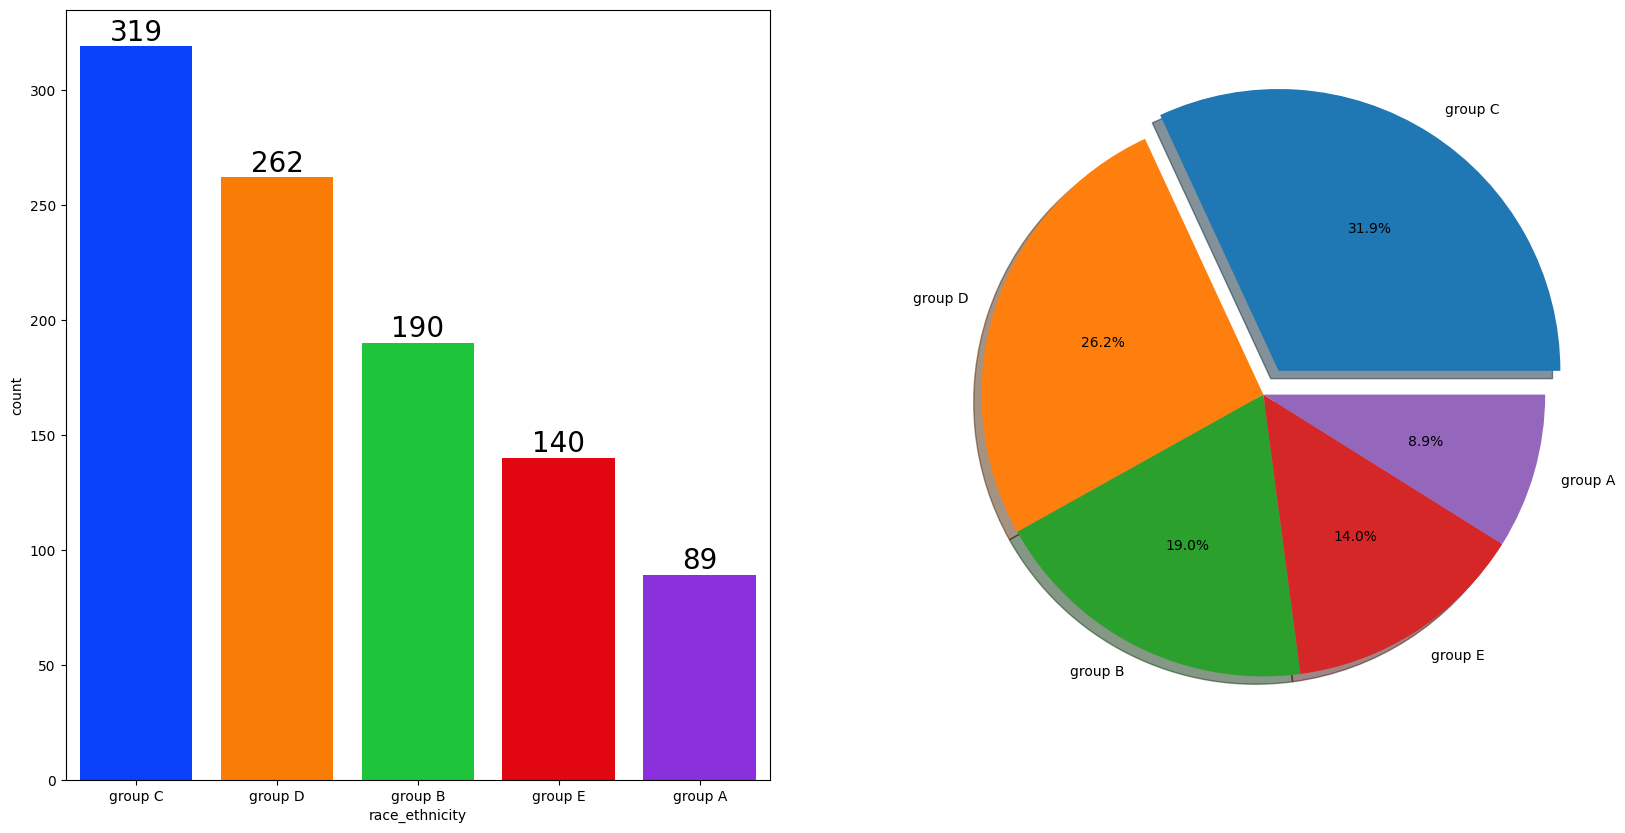

In [25]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(
    x=df["race_ethnicity"],
    data=df,
    palette="bright",
    order=df["race_ethnicity"].value_counts().index,
    ax=ax[0],
    saturation=0.95,
)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

plt.pie(
    x=df["race_ethnicity"].value_counts(),
    labels=df["race_ethnicity"].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct="%1.1f%%",
    shadow=True,
)
plt.show()

**Insights**
- Most of the students belong to the racial/ethnicity Groups C or D.
- Lowest number of students belong to racial/ethnicity Group A.

### Bivariate Analysis (Does race/ethnicity have any impact on student's performance?)

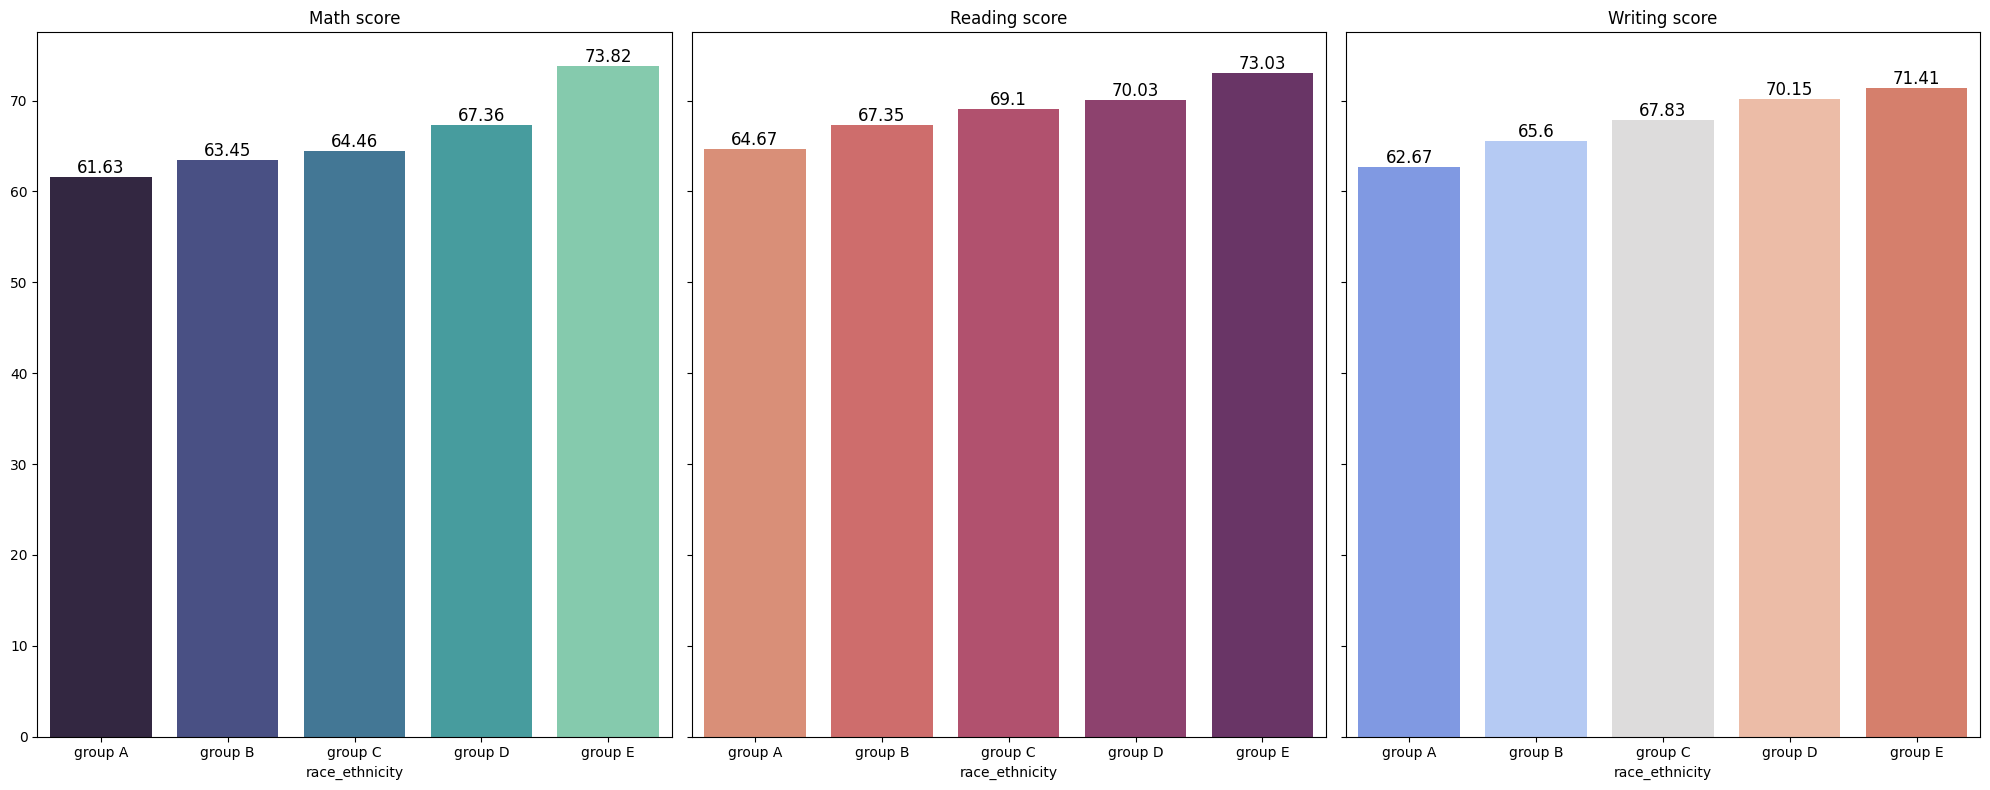

In [26]:
ethnicity_group = df[["race_ethnicity"] + numeric_features].groupby("race_ethnicity")

_, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
sns.barplot(
    x=ethnicity_group["math_score"].mean().index,
    y=np.round(ethnicity_group["math_score"].mean().values, 2),
    palette="mako",
    ax=ax[0],
)
ax[0].set_title("Math score")

for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=12)

sns.barplot(
    x=ethnicity_group["reading_score"].mean().index,
    y=np.round(ethnicity_group["reading_score"].mean().values, 2),
    palette="flare",
    ax=ax[1],
)
ax[1].set_title("Reading score")

for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=12)

sns.barplot(
    x=ethnicity_group["writing_score"].mean().index,
    y=np.round(ethnicity_group["writing_score"].mean().values, 2),
    palette="coolwarm",
    ax=ax[2],
)
ax[2].set_title("Writing score")

for container in ax[2].containers:
    ax[2].bar_label(container, color="black", size=12)

plt.tight_layout()
plt.show()

**Insights**
1. Students in racial/ethnicity Group E seem to have scored the best across all tests.
2. Similarly, students in racial/ethnicity Group A seem to have scored the lowest across all tests.

### 4.4.3 Parental Level of Education

- What is educational background of student's parents?
- Does parental level of education have any impact on student's performance?

### Univariate Analysis (What is educational background of student's parents?)

In [27]:
df["parental_level_of_education"].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

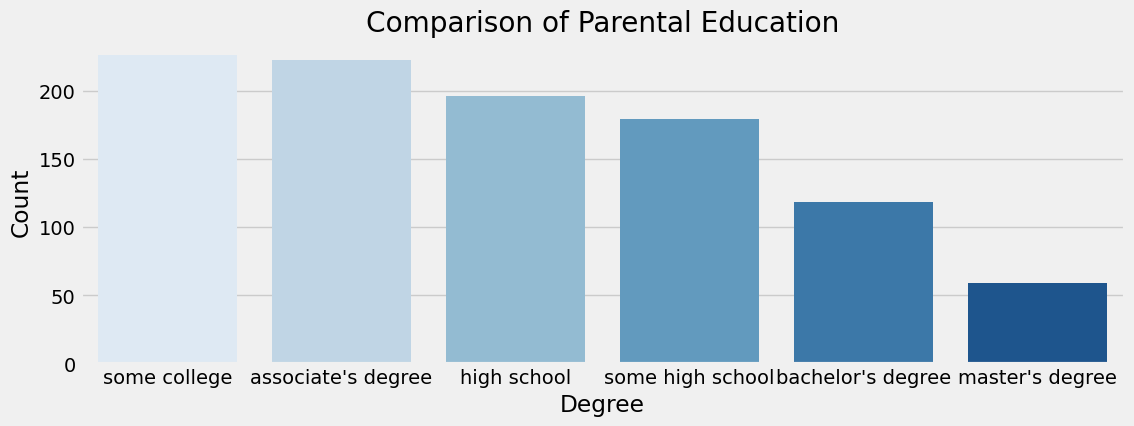

In [28]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.style.use("fivethirtyeight")
sns.countplot(
    x=df["parental_level_of_education"],
    order=df["parental_level_of_education"].value_counts().index,
    palette="Blues",
)
plt.title("Comparison of Parental Education")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

**Insights**
1. Most parents are from some college.

### Bivariate Analysis (Does parental level of education have any impact on student's performance?)

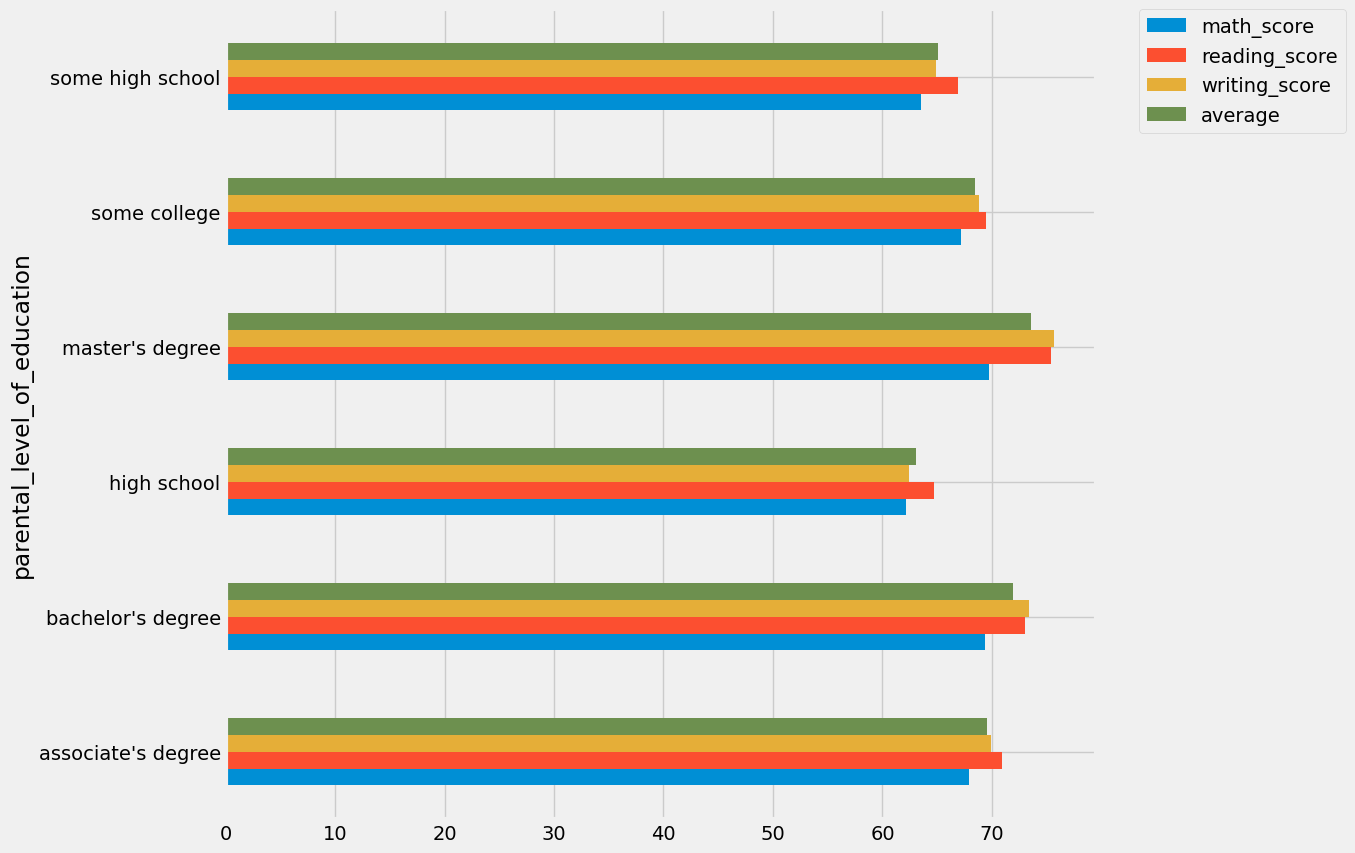

In [29]:
education_group = (
    df[["parental_level_of_education"] + numeric_features]
    .groupby("parental_level_of_education")
    .agg("mean")
    .drop("total_score", axis=1)
)
education_group.plot(kind="barh", figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

**Insights**
1. The scores of students whose parents possess a Master's or Bachelor's degree level education are higher than others.

### 4.4.4 Test Preparation

- Does the test prepration course have any impact on student's performance?

### BIvariate Analysis (Does the test prepration course have any impact on student's performance?)

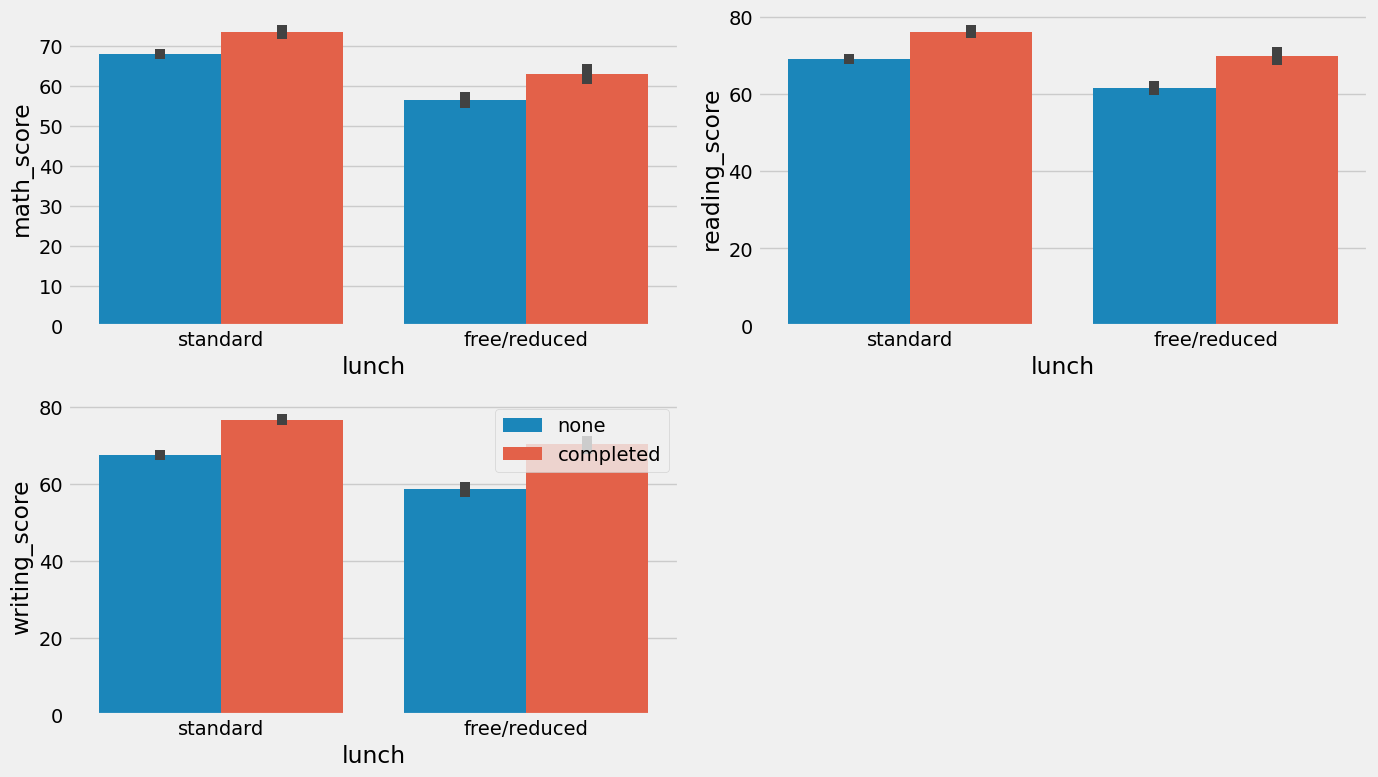

In [30]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=df["lunch"], y=df["math_score"], hue=df["test_preparation_course"])
plt.legend([], [], frameon=False)
plt.subplot(2, 2, 2)
sns.barplot(x=df["lunch"], y=df["reading_score"], hue=df["test_preparation_course"])
plt.legend([], [], frameon=False)
plt.subplot(2, 2, 3)
sns.barplot(x=df["lunch"], y=df["writing_score"], hue=df["test_preparation_course"])
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

**Insights**
1. Students who have completed the test prepration course have higher scores in all three categories than those who hasn't taken the course.

### 4.4.6 Checking Outliers

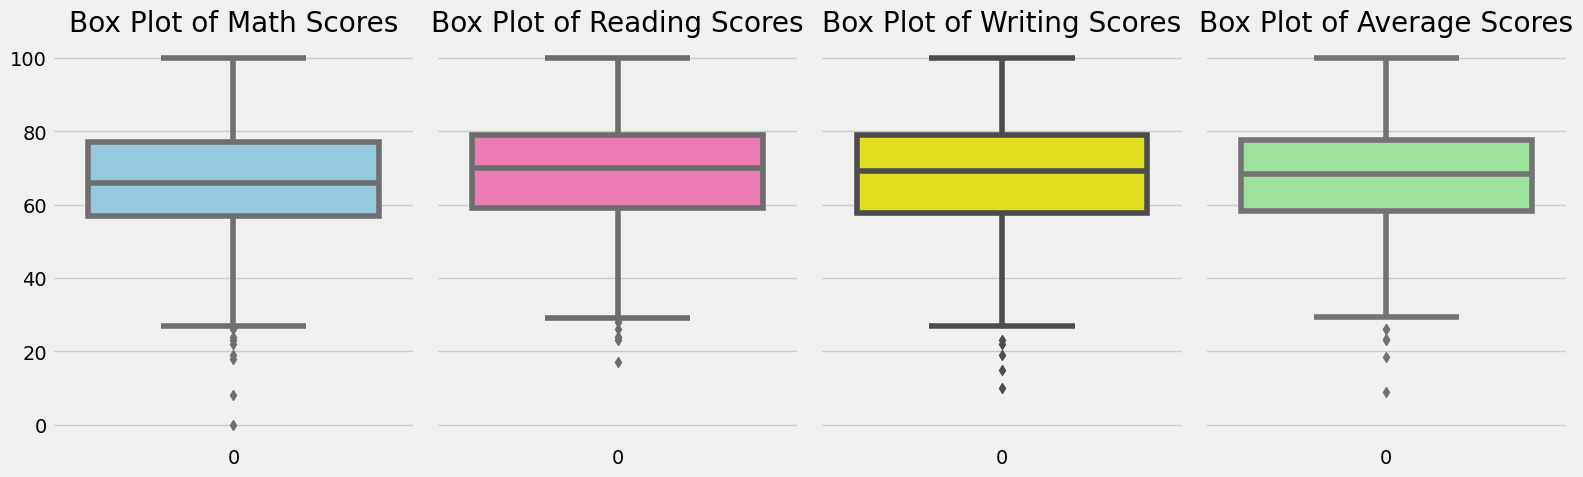

In [31]:
plt.subplots(1, 4, figsize=(16, 5), sharey=True)
plt.subplot(141)
sns.boxplot(df["math_score"], color="skyblue")
plt.title("Box Plot of Math Scores")

plt.subplot(142)
sns.boxplot(df["reading_score"], color="hotpink")
plt.title("Box Plot of Reading Scores")

plt.subplot(143)
sns.boxplot(df["writing_score"], color="yellow")
plt.title("Box Plot of Writing Scores")

plt.subplot(144)
sns.boxplot(df["average"], color="lightgreen")
plt.title("Box Plot of Average Scores")

plt.tight_layout()
plt.show()

### 4.4.7 Multivariate Analysis using Pair Plot

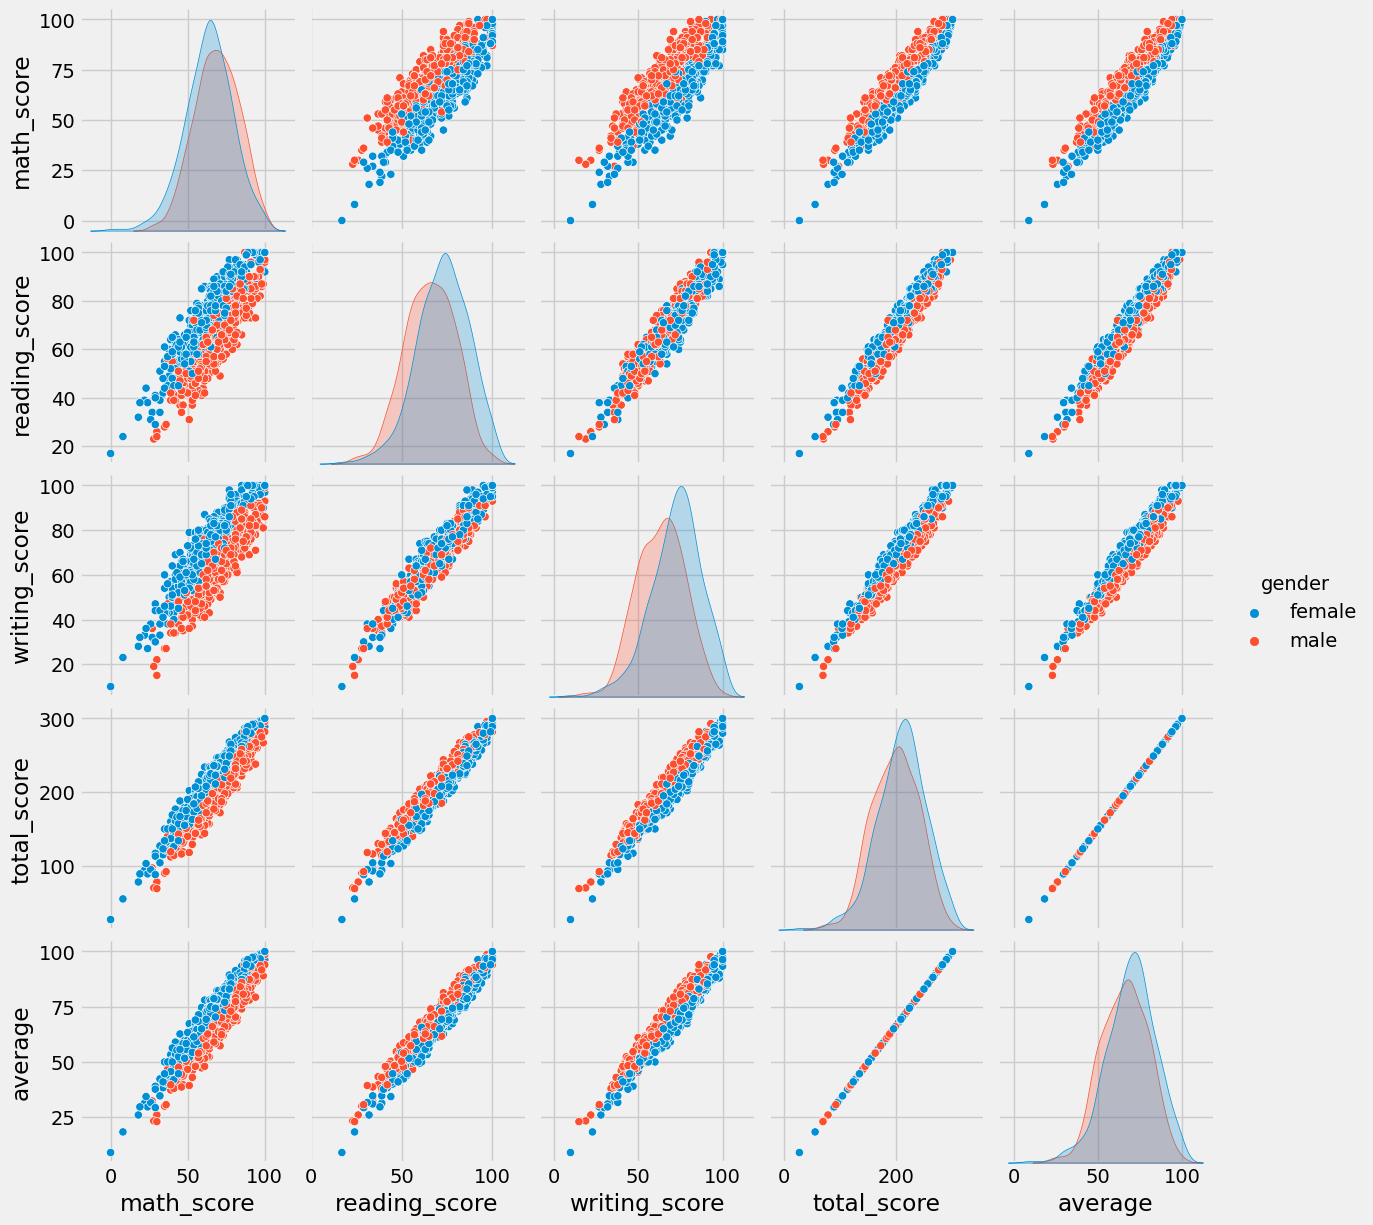

In [32]:
sns.pairplot(df, hue="gender")
plt.show()

**Insights**
1. From the above pair plot, it is clear that all the scores increase linearly with one another.

## 5. Conclusions

1. A student's performance is highly related with the type of lunch provided, their race/ethnicity annd parental level of education.
2. Females tend to do better than males.
3. Surprisingly, a student's performance does not relate much with the test preparation course.
4. However, it does not mean to say the preparation course are entirely useless. Finishing preparation course is still benefitial (albeit slightly).